# Statistical Data Visualization (Seaborn) - Categorical Plots

      In seaborn, there are several different ways to visualize a relationship involving categorical data.

      Similar to the relationship between relplot() and either scatterplot() or lineplot(),
      there are two ways to make these plots.
      
      There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface,
      catplot(), that gives unified higher-level access to them.

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdb

## Categorical Scatterplot

In [ ]:
# Dataset

penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")

# penguins.head()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


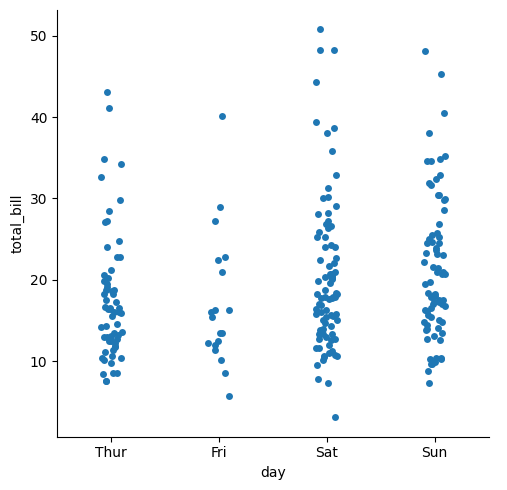

In [ ]:
# stripplot()

sns.catplot(data=tips, x="day", y="total_bill")

# jitter (bool)

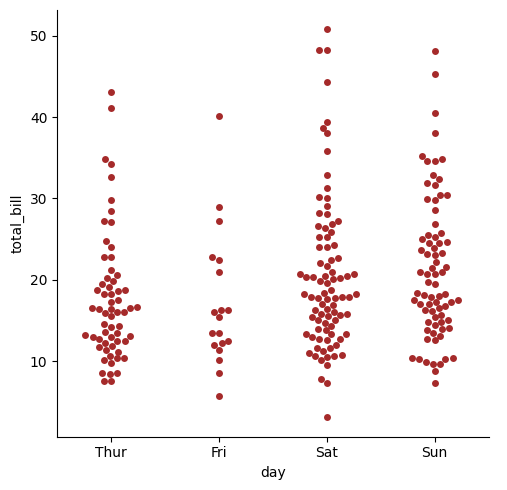

In [ ]:
# swarmplot

sns.catplot(data=tips, x="day", y="total_bill", kind="swarm", color = 'brown')
# sns.catplot(data=tips.query('size != 3'), x = 'size', y = 'total_bill')
# sns.catplot(data=tips, x = 'smoker', y = 'tip', order = ['No','Yes'])

plt.show()

# hue (column/series) - e.g. 'sex'
# Note: catplot does not support style and size attributes

## Comparing Distributions

      As the size of the dataset grows, categorical scatter plots become limited in the
      information they can provide about the distribution of values within each category.
      
      When this happens, there are several approaches for summarizing the distributional
      information in ways that facilitate easy comparisons across the category levels.



### Boxplots

      This kind of plot shows the three quartile values of the distribution along with extreme values.
      
      The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations
      that fall outside this range are displayed independently.
      
      This means that each value in the boxplot corresponds to an actual observation in the data.

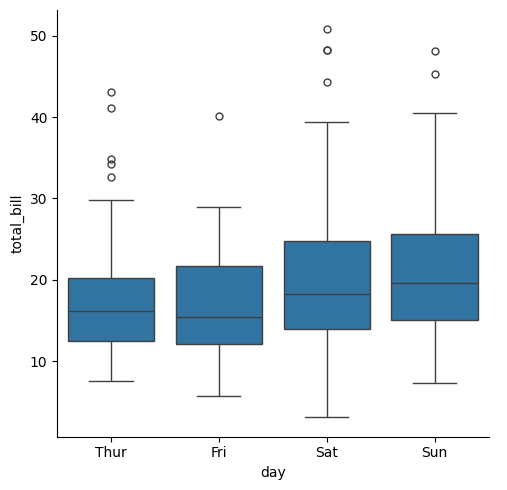

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

#sns.catplot(data=tips, x="day", y="total_bill", kind="box",
            #hue="smoker", height = 5, aspect = 1.25,
            #width = 0.5, palette = {'Yes': 'red', 'No': 'green'})

plt.show()

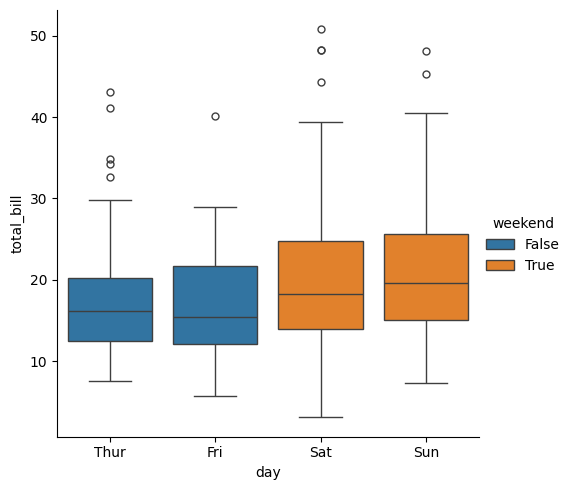

In [ ]:
# Another variation

tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box")

### BoxenPlot

      Draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution.
      It is best suited for larger datasets:

In [ ]:
# Sample Data

diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


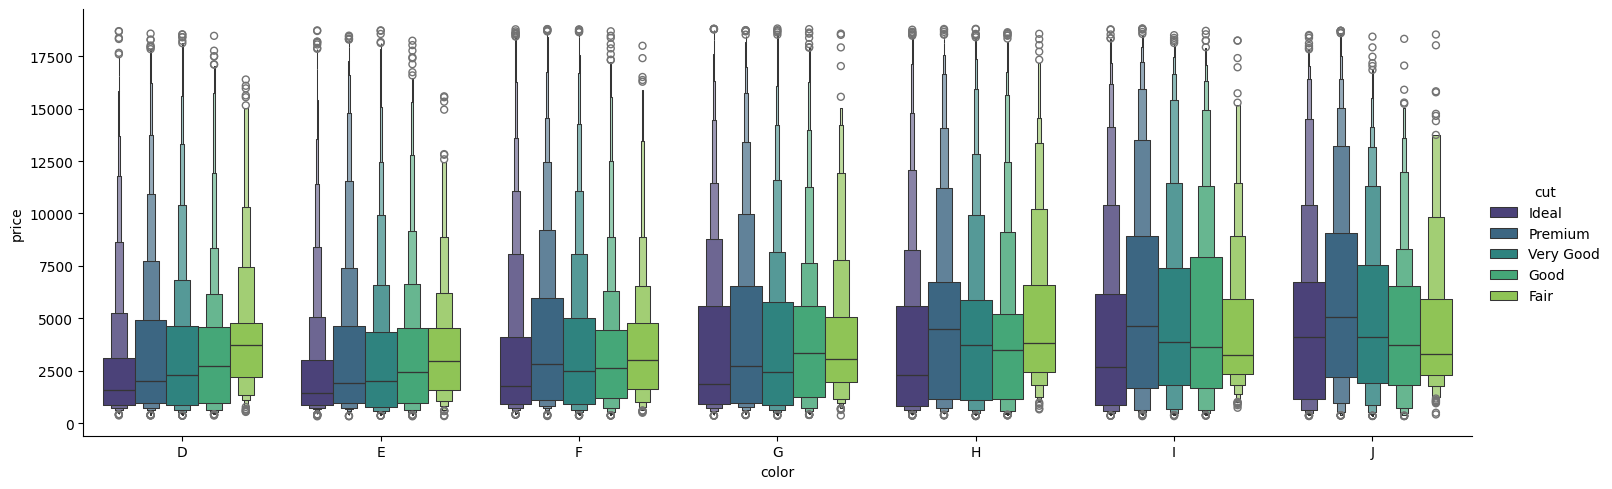

In [ ]:
# Boxen

sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen", hue = 'cut', palette = 'viridis', aspect = 3
)

### Violin Plots

      A different approach is a violinplot(), which combines a boxplot with the kernel density estimation
      procedure described in the distributions tutorial

Text(0.5, 1.05, 'Day and Total Bill')

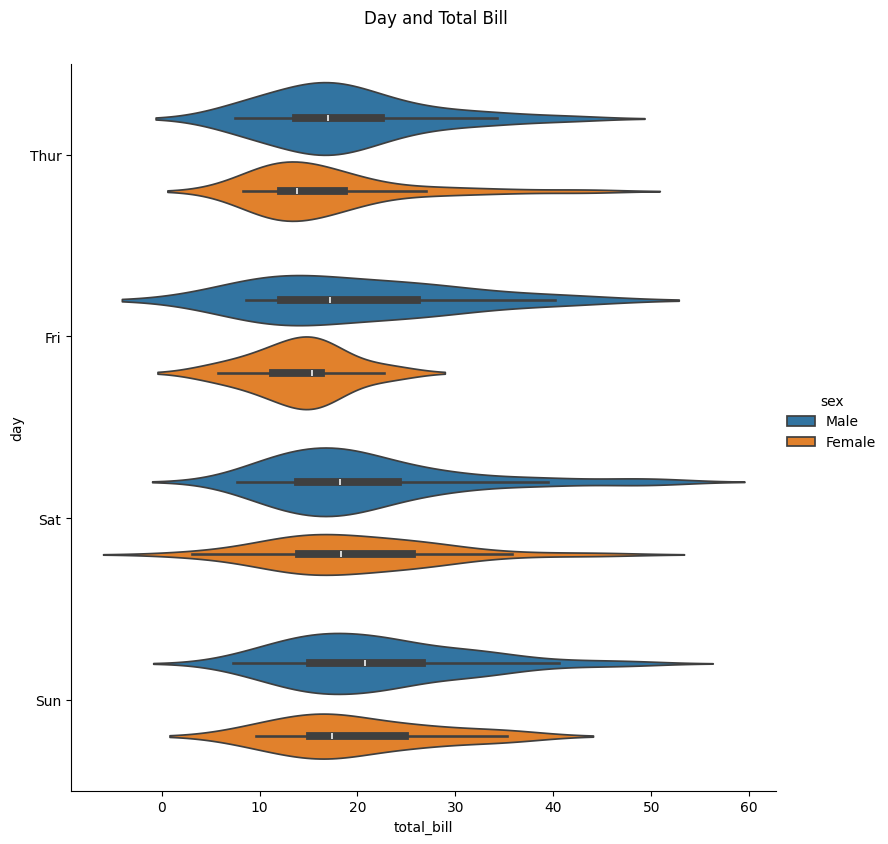

In [ ]:
# Violin

g = sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin", height = 8, aspect = 1
)

# Adding a title
g.fig.suptitle("Day and Total Bill", y=1.05)  # Adjust 'y' to position the title

# cut (float)

Text(0.5, 1.05, 'Day and Total Bill')

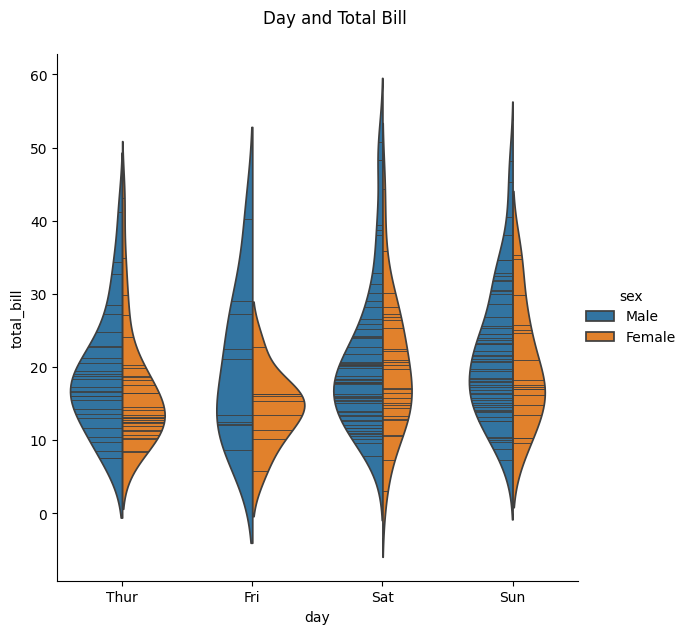

In [ ]:
# Splitting

g = sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex", kind="violin", height = 6, aspect = 1, split = True, inner = 'stick'
)

# Adding a title
g.fig.suptitle("Day and Total Bill", y=1.05)  # Adjust 'y' to position the title

# split (bool)
# inner (None, 'stick')

<Axes: xlabel='day', ylabel='total_bill'>

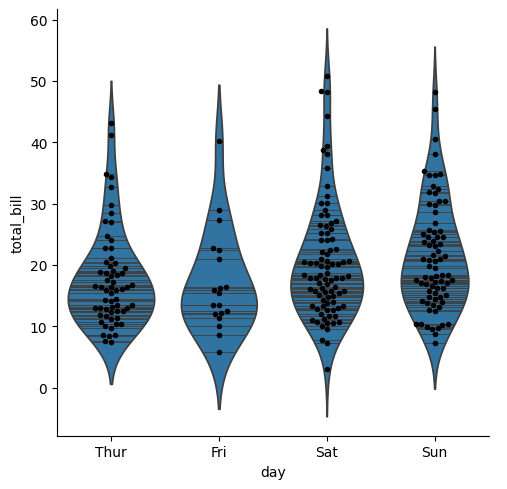

In [ ]:
# Combining with swarmplot to show more observation

g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner = 'stick')
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=4, ax = g.ax)

## Estimating Central Tendency

      For other applications, rather than showing the distribution within each category,
      you might want to show an estimate of the central tendency of the values.
      
      Seaborn has two main ways to show this information.
      Importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar Plots

In [ ]:
# Dataset

titanic = sns.load_dataset("titanic")
# titanic = titanic.dropna()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


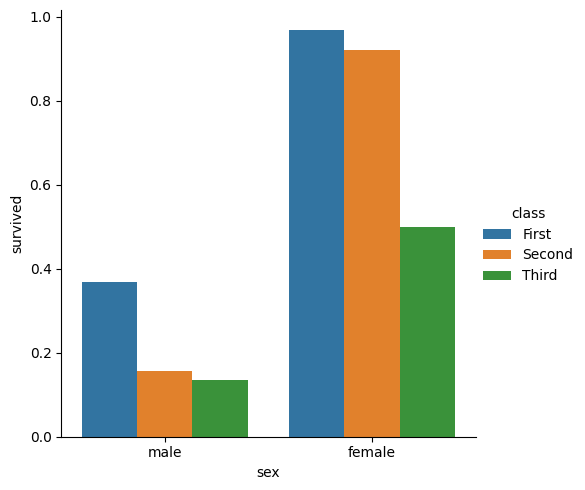

In [ ]:
# Bar in sns takes the .mean by default

sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar", errorbar = None)

# errorbar (None)

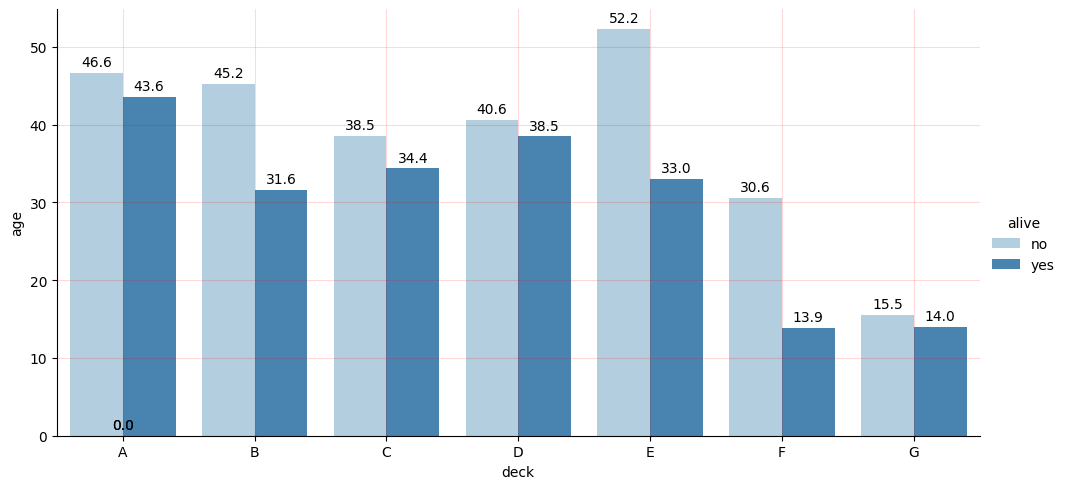

In [ ]:
# Bar

# Create the catplot
g = sns.catplot(
    data=titanic,
    x="deck",
    y="age",
    hue = 'alive',
    kind="bar",
    palette='Blues',
    errorbar=None,
    aspect = 2
)

# Get the axes object to annotate
ax = g.ax

# Annotate each bar
for bar in ax.patches:

    bar_height = bar.get_height()  # Get the height of each bar
    bar_x = bar.get_x() + bar.get_width() / 2  # Get the x-coordinate for the annotation
    ax.text(bar_x, bar_height + 0.5, f'{bar_height:.1f}', ha='center', va='bottom')  # Add annotation

plt.grid(alpha = 0.15, color = 'red')

# Show the plot
plt.show()

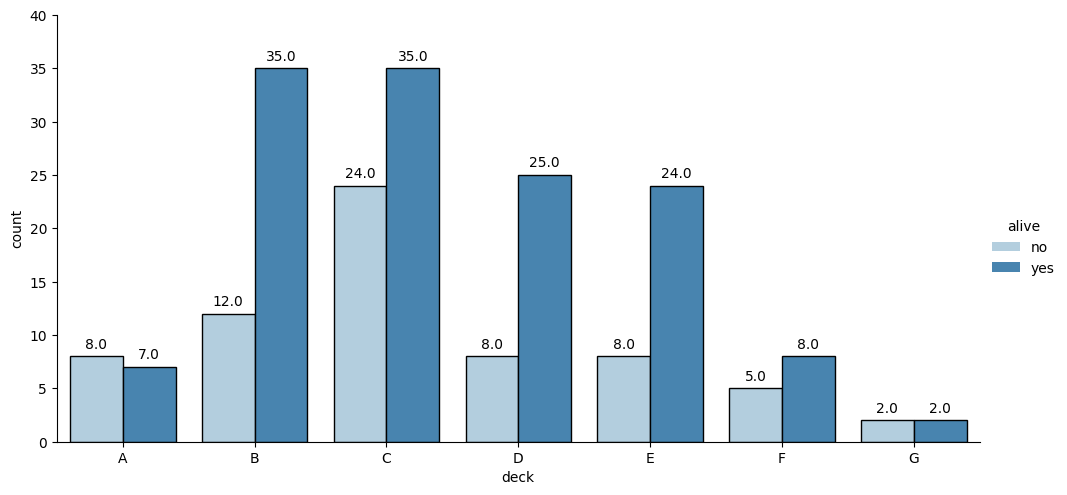

In [ ]:
# Bar (count), fixing zero values

# Create the catplot
g = sns.catplot(
    data=titanic,
    x="deck",
    hue = 'alive',
    kind="count",
    palette='Blues',
    errorbar=None,
    aspect = 2
)

# Get the axes object to annotate
ax = g.ax

# Annotate each bar
for bar in ax.patches:

    bar_height = bar.get_height()  # Get the height of each bar

    if bar_height > 0:  # Only annotate bars with height > 0

        bar_x = bar.get_x() + bar.get_width() / 2  # Center x-coordinate for annotation
        ax.text(bar_x, bar_height + 0.5, f'{bar_height:.1f}', ha='center', va='bottom')  # Add annotation

# Add border to each bar
for bar in ax.patches:

    bar.set_edgecolor('black')  # Set the border color
    bar.set_linewidth(1)  # Set the border width

# Set y-axis limit
ax.set_ylim(0, 40)  # Set the limits of the y-axis (0 to 60, as an example)

# Show the plot
plt.show()

### Point Plot

        An alternative style for visualizing the same information is offered by the pointplot() function.
        
        This function also encodes the value of the estimate with height on the other axis,
        but rather than showing a full bar, it plots the point estimate and confidence interval.
        
        Additionally, pointplot() connects points from the same hue category.
        This makes it easy to see how the main relationship is changing as a function of the hue semantic,
        because your eyes are quite good at picking up on differences of slopes:

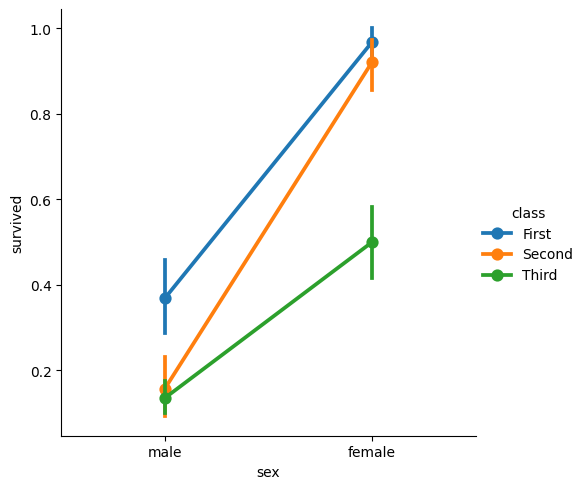

In [ ]:
# Point Plot

sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

# This visualization is ideal for uncovering relationships between categorical variables (like sex and class)
# and a numerical outcome (like survival). It helps convey the influence of social factors on survival outcomes.